<a href="https://colab.research.google.com/github/Nargis45/Credit-Card-Default-Prediction/blob/main/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Default Prediction**

**This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customer will default on their credit card payments.**

# **Dataset Information**
* **Number of instances: 30000**
* **Number of attributes: 25**

# **Features Information**

* **ID:** ID of each client

* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* **SEX**: Gender (1 = male, 2 = female)

* **EDUCATION**: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

* **MARRIAGE**: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

* **AGE**: Age in years

* **Scale for PAY_0 to PAY_6 :** (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* **PAY_0**: Repayment status in September, 2005 (scale same as above)

* **PAY_2**: Repayment status in August, 2005 (scale same as above)

* **PAY_3**: Repayment status in July, 2005 (scale same as above)

* **PAY_4**: Repayment status in June, 2005 (scale same as above)

* **PAY_5**: Repayment status in May, 2005 (scale same as above)

* **PAY_6**: Repayment status in April, 2005 (scale same as above)

* **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)

* **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)

* **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)

* **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)

* **BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)

* **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)

* **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)

* **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)

* **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)

* **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)

* **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)

* **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)

# **Target Variable**
* **default payment next month:** 1-Default, 0-Not default


# **Goal**

The main objective of our project is to predict which customer might default in upcoming months.

**Meaning:**
* We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

* Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

# **Project Work flow**
1. Importing Libraries

2. Loading the Dataset

3. EDA on features

4. Feature Engineering

5. Feature Selection

6. Modeling and HyperParameter Tuning

7. Selecting the best model

8. Conclusion

# **1. Importing Libraries**

In [153]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Loading the Dataset**

In [151]:
#loading the dataset and creating a dataframe
pd.set_option('display.max_columns',None)
df= pd.read_csv('/content/drive/MyDrive/credit card default prediction/default of credit card clients.csv',header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **3. Exploratory Data Analysis on features**

In [155]:
df.shape

(30000, 25)

In [156]:
df.rename(columns={'default payment next month': 'Default'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [158]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [159]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [160]:
df.Default.value_counts()

0    23364
1     6636
Name: Default, dtype: int64

## **Dependent Feature**

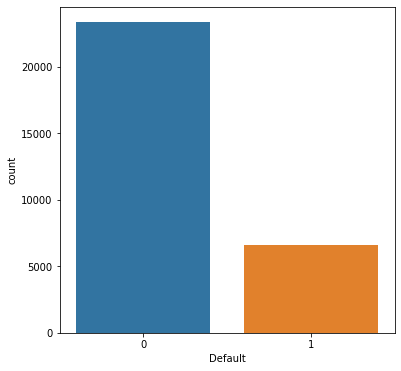

In [161]:
#plotting count of default and not default 
plt.figure(figsize=(6,6))
sns.countplot('Default',data=df)

* **Not default value is very high than default. So, dataset is imbalanced.**

## **Independent Features**

**SEX**

In [162]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [163]:
df_cat_features=df[['SEX']]
df_cat_features.replace({'SEX':{1:'Male', 2:'Female'}},inplace=True)
df_cat_features.head()

,SEX
0,Female
1,Female
2,Female
3,Female
4,Male


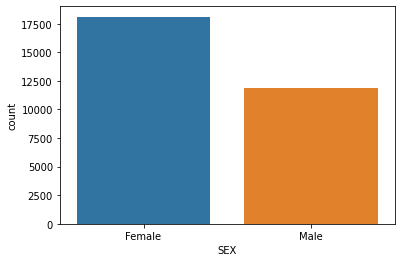

In [164]:
#plotting count of male and female
sns.countplot('SEX',data=df_cat_features)

* **Most of the customers are female.**

**Education**

In [165]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [166]:
others=(df['EDUCATION']==5) | (df['EDUCATION']==6) | (df['EDUCATION']==0)
df.loc[others,'EDUCATION']=4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [167]:
df_cat_features['EDUCATION']=df['EDUCATION']

In [168]:
df_cat_features.replace({'EDUCATION':{1:'graduate_school', 2:'University',3:'high_school',4:'others'}},inplace=True)

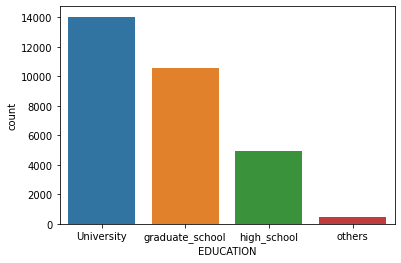

In [169]:
#
sns.countplot('EDUCATION',data=df_cat_features)

* **Most of the users are still in university.**

**Marriage**

In [170]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [171]:
others=df['MARRIAGE']==0
df.loc[others,'MARRIAGE']=3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [172]:
df_cat_features['MARRIAGE']=df['MARRIAGE']

In [173]:
df_cat_features.replace({'MARRIAGE':{1:'Married', 2:'Single',3:'others'}},inplace=True)

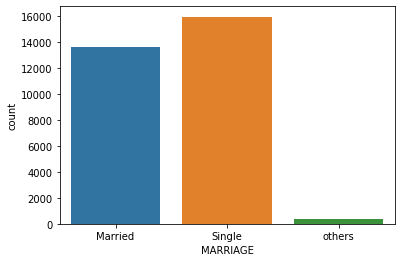

In [174]:
sns.countplot('MARRIAGE',data=df_cat_features)

* **Most of the credit card users are single.**

In [175]:
df_cat_features['Default']=df['Default']

In [176]:
df_cat_features.head()

,SEX,EDUCATION,MARRIAGE,Default
0,Female,University,Married,1
1,Female,University,Single,1
2,Female,University,Single,0
3,Female,University,Married,0
4,Male,University,Married,0


In [177]:
cat_features=['SEX','EDUCATION','MARRIAGE']

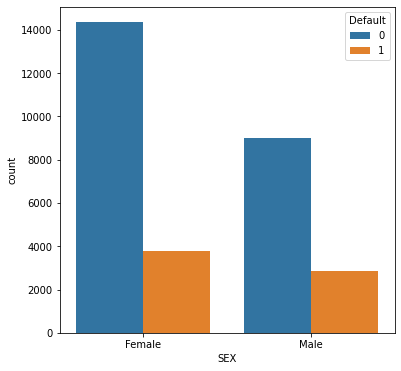

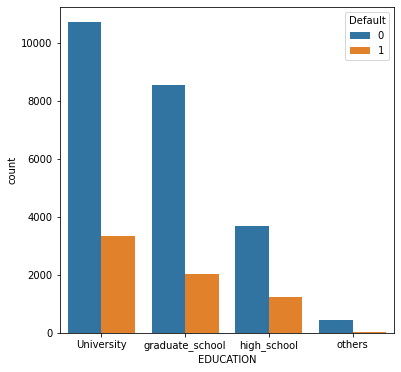

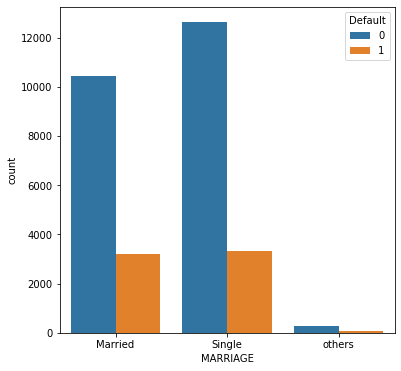

In [178]:
for col in cat_features:
  plt.subplots(ncols=1,figsize=(6,6))
  sns.countplot(col,hue='Default',data=df_cat_features)

* **So, users who are female, single and in university have no pending payments.**

In [179]:
age_df=df.AGE.value_counts().reset_index()
age_df.rename(columns={'index':'age','AGE':'count'},inplace=True)
age_df

,age,count
0,29,1605
1,27,1477
2,28,1409
3,30,1395
4,26,1256
5,31,1217
6,25,1186
7,34,1162
8,32,1158
9,33,1146


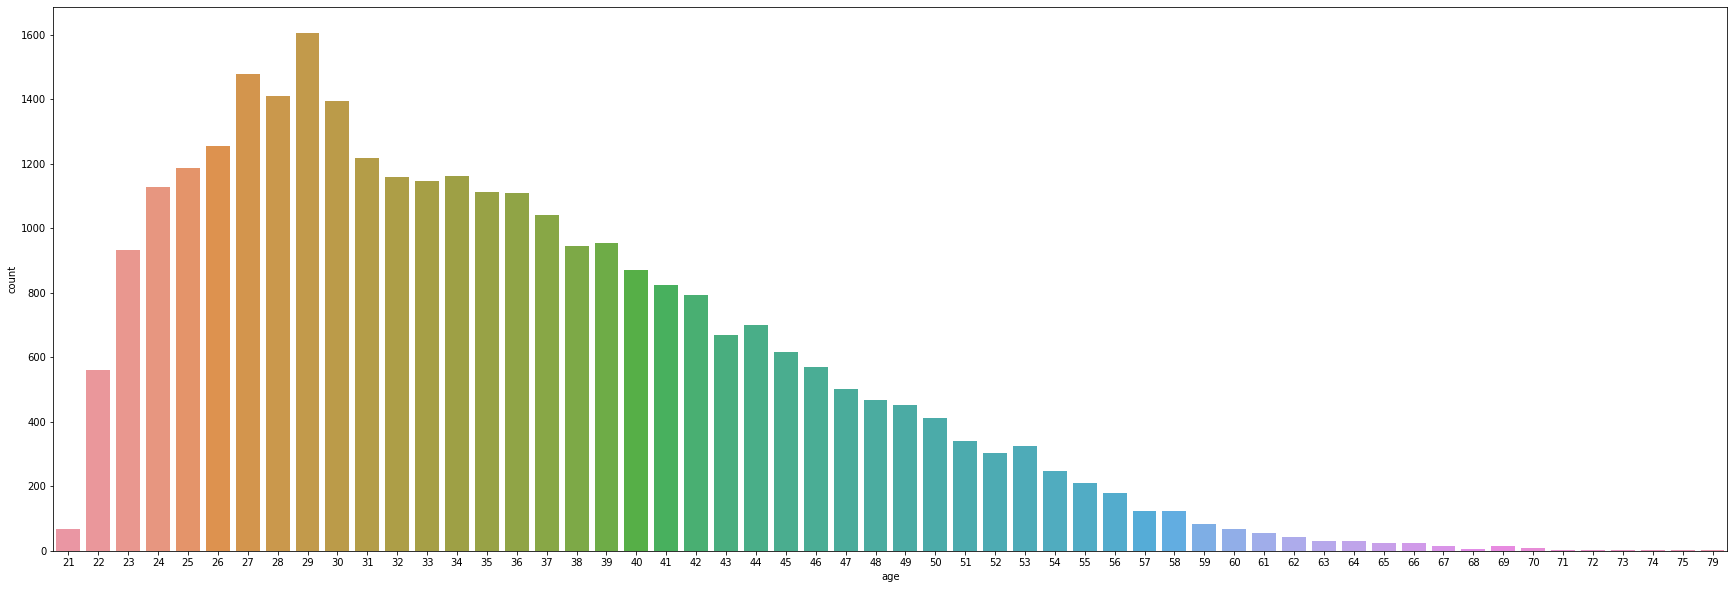

In [180]:
plt.figure(figsize=(30,10))
sns.barplot(x='age',y='count',data=age_df)

In [181]:
df.groupby('Default')['AGE'].mean()

Default
0    35.417266
1    35.725738
Name: AGE, dtype: float64

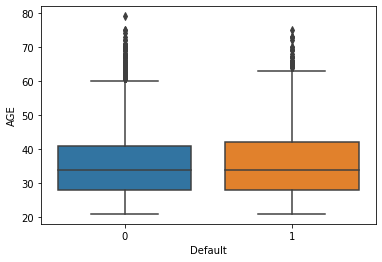

In [182]:
sns.boxplot(x='Default',y='AGE',data=df)

* **Most of the users age is between 25 to 40 for both default and not default.** 

In [183]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

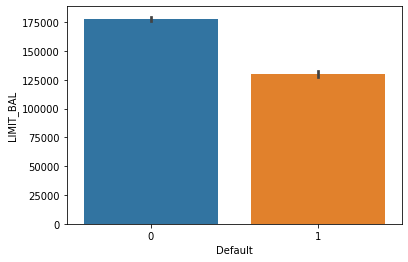

In [184]:
sns.barplot(x='Default',y='LIMIT_BAL',data=df)

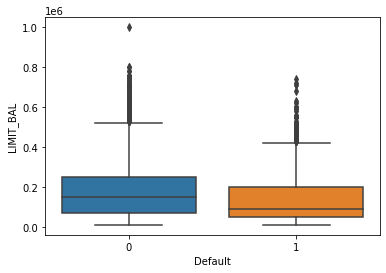

In [185]:
sns.boxplot(x='Default',y='LIMIT_BAL',data=df)

In [186]:
#renaming columns 
 
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

In [187]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## **Paid Amount**

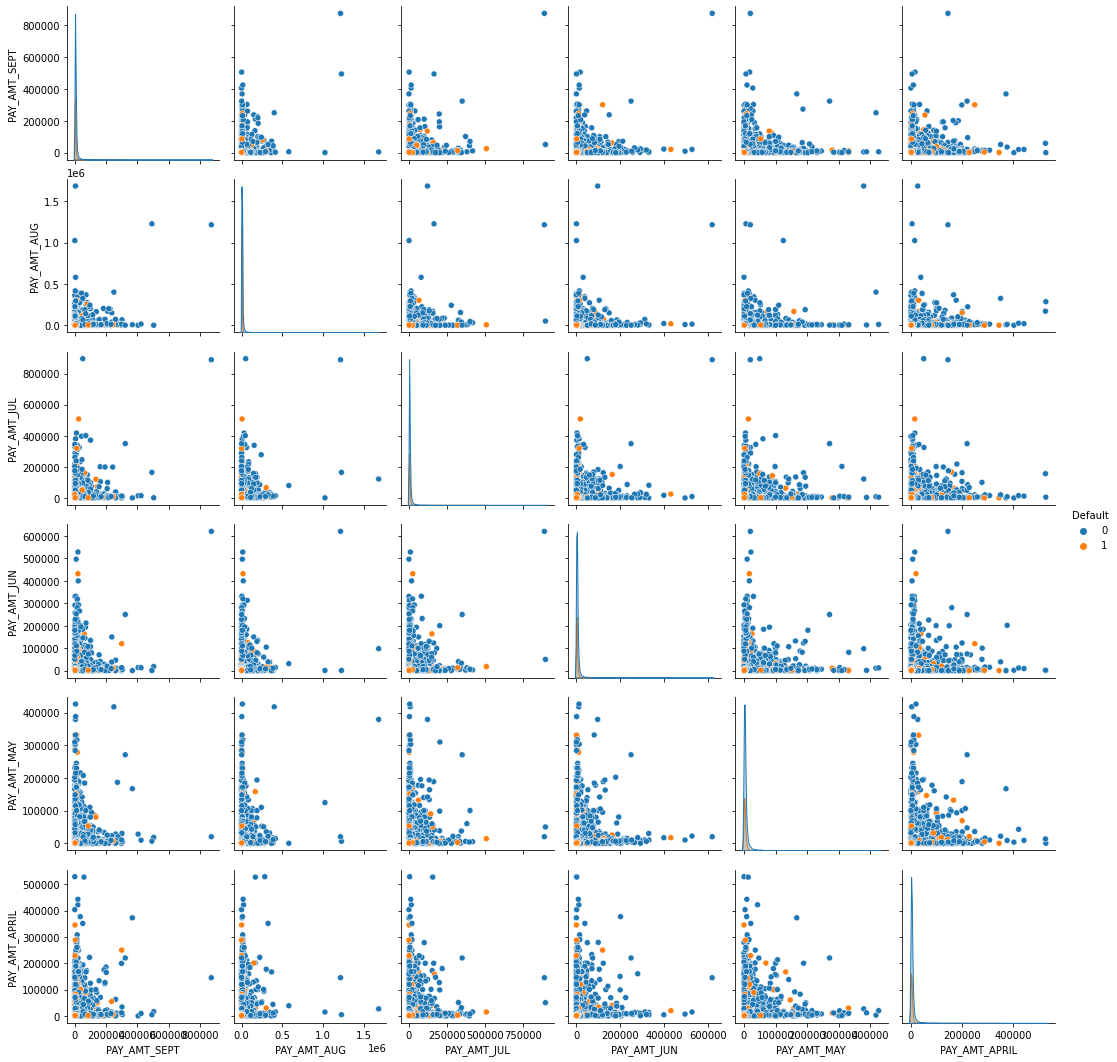

In [191]:
df_pay_amt=df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APRIL','Default']]
sns.pairplot(data=df_pay_amt,hue='Default')

## **History Payment Status**

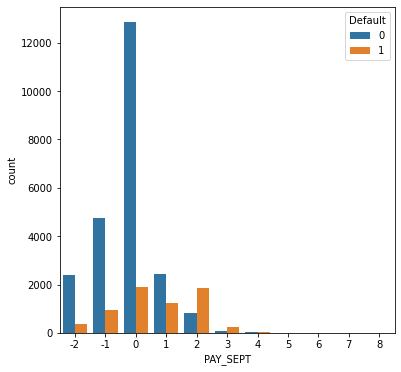

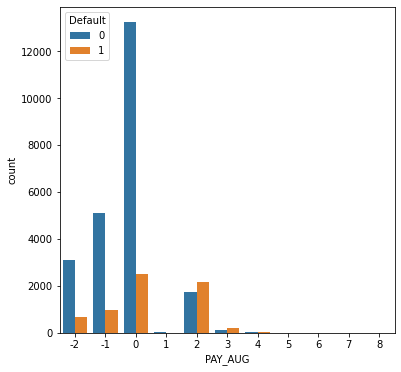

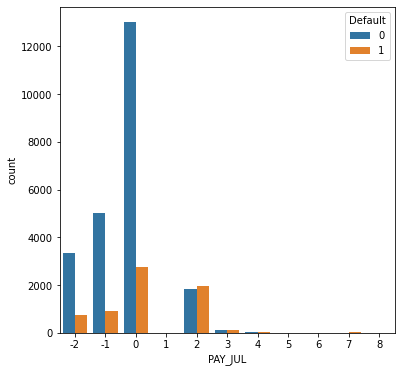

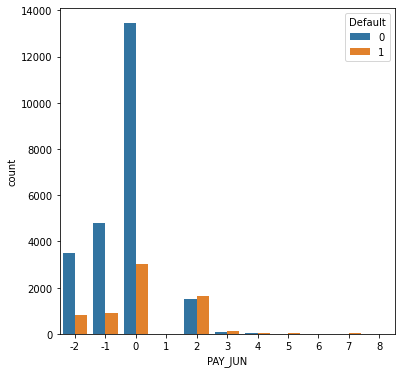

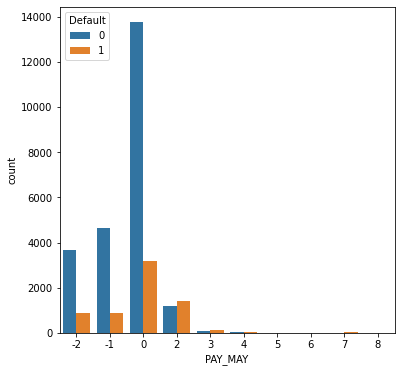

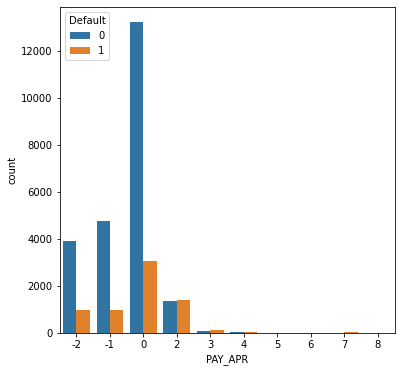

In [38]:
pay_col=['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(6,6))
  sns.countplot(col,hue='Default',data=df)

## **Correlation**

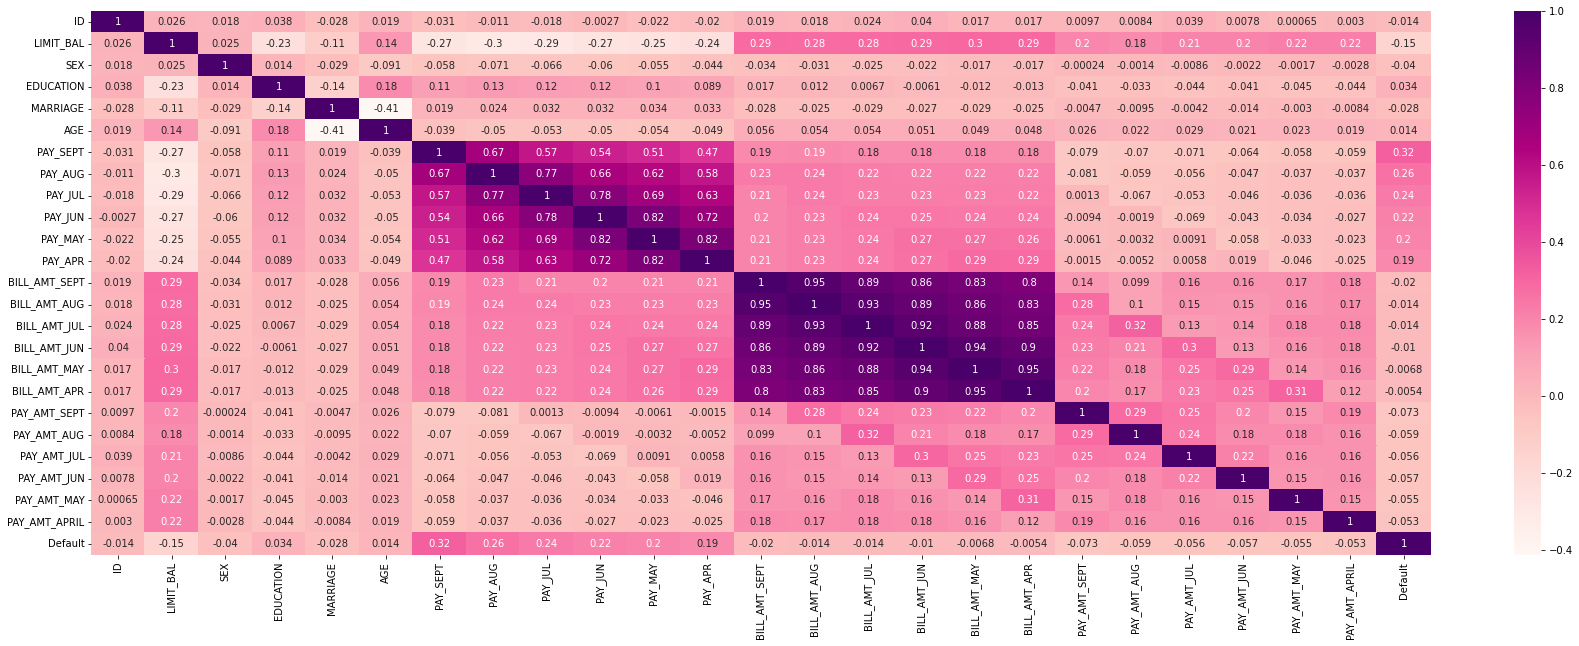

In [39]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot=True,cmap='RdPu')

# **4. Feature Engineering**

### **As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)**

In [40]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(df.iloc[:,0:-1],df['Default'])
print('size before over sampling',len(df))
print('size after over sampling',len(X_smote))

size before over sampling 30000
size after over sampling 46728


In [41]:
X_smote.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [42]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Default, Length: 46728, dtype: int64

In [43]:
balanced_df=pd.DataFrame(X_smote)

In [44]:
balanced_df['Default']=y_smote

In [45]:
balanced_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


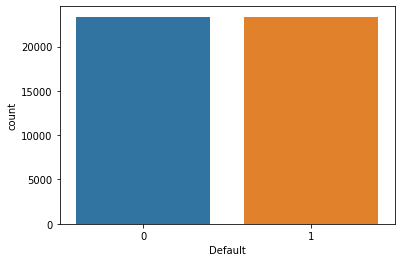

In [46]:
sns.countplot('Default',data=balanced_df)

In [47]:
df_new=balanced_df.copy()

In [48]:
df_new['payment_status']=df_new['PAY_SEPT']+df_new['PAY_AUG']+df_new['PAY_JUL']+df_new['PAY_JUN']+df_new['PAY_MAY']+df_new['PAY_APR']		

In [49]:
df_new.groupby('Default')['payment_status'].mean()

Default
0   -1.98014
1    1.62271
Name: payment_status, dtype: float64

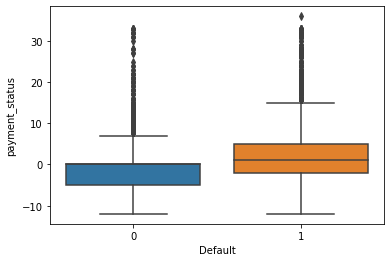

In [50]:
sns.boxplot(x='Default',y='payment_status',data=df_new)

In [51]:
df_new['dues']=df_new['BILL_AMT_SEPT']+df_new['BILL_AMT_AUG']+df_new['BILL_AMT_JUL']+df_new['BILL_AMT_JUN']+df_new['BILL_AMT_MAY']+df_new['BILL_AMT_APR']		

In [52]:
df_new.groupby('Default')['dues'].mean()

Default
0    272428.907850
1    259206.566898
Name: dues, dtype: float64

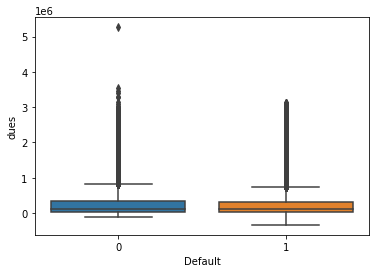

In [53]:
sns.boxplot(x='Default',y='dues',data=df_new)

In [54]:
df_new.SEX.value_counts()

2    23501
1    23227
Name: SEX, dtype: int64

In [55]:
df_new.replace({'SEX':{1:'Male',2:'Female'}, 'MARRIAGE':{1:'Married', 2:'Single',3:'others'},'EDUCATION':{1:'graduate_school', 2:'University',3:'high_school',4:'others'}},inplace=True)

## **One Hot Encoding**

In [56]:
df_new=pd.get_dummies(df_new,columns=['EDUCATION','MARRIAGE'])

In [57]:
df_new.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Default,payment_status,dues,EDUCATION_University,EDUCATION_graduate_school,EDUCATION_high_school,EDUCATION_others,MARRIAGE_Married,MARRIAGE_Single,MARRIAGE_others
0,1,20000,Female,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,7704,1,0,0,0,1,0,0
1,2,120000,Female,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,17077,1,0,0,0,0,1,0
2,3,90000,Female,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,101653,1,0,0,0,0,1,0
3,4,50000,Female,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,231334,1,0,0,0,1,0,0
4,5,50000,Male,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,109339,1,0,0,0,1,0,0


In [58]:
df_new.drop(['EDUCATION_others','MARRIAGE_others'],axis=1,inplace=True)

In [59]:
df_new=pd.get_dummies(df_new,columns=['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'],drop_first=True)

In [60]:
df_new.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Default,payment_status,dues,EDUCATION_University,EDUCATION_graduate_school,EDUCATION_high_school,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,Female,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,7704,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,Female,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,17077,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,Female,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,101653,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,50000,Female,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,231334,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,50000,Male,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,109339,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [61]:
df_new.shape

(46728, 84)

In [62]:
df_new.replace({'SEX':{'Female':0,'Male':1}},inplace=True)

In [63]:
df_new.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Default,payment_status,dues,EDUCATION_University,EDUCATION_graduate_school,EDUCATION_high_school,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,7704,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,17077,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,101653,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,231334,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,109339,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [64]:
df_new.drop('ID',axis=1,inplace=True)

# **5. Feature Selection**

# **6. HyperParameter Tuning and Modeling**

## **Logistic Regression**

In [134]:
df_logistic=df_new.copy()

In [135]:
X=df_logistic.drop(['payment_status','dues','Default'],axis=1)
y=df_logistic['Default']

In [136]:
columns=X.columns
columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'EDUCATION_University',
       'EDUCATION_graduate_school', 'EDUCATION_high_school',
       'MARRIAGE_Married', 'MARRIAGE_Single', 'PAY_SEPT_-1', 'PAY_SEPT_0',
       'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5',
       'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0',
       'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5',
       'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0',
       'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5',
       'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JUN_0',
       'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5',
       'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-1', 'PAY_MAY_0',
       

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-1.0679593 , -0.99415337, -1.29336212, ..., -0.034328  ,
        -0.03982643, -0.00654238],
       [-0.27290038, -0.99415337, -1.06677754, ..., -0.034328  ,
        -0.03982643, -0.00654238],
       [-0.51141806, -0.99415337, -0.16043922, ..., -0.034328  ,
        -0.03982643, -0.00654238],
       ...,
       [ 0.04248359,  1.00588101, -0.61360838, ..., -0.034328  ,
        -0.03982643, -0.00654238],
       [ 0.36314675,  1.00588101,  0.63260681, ..., -0.034328  ,
        -0.03982643, -0.00654238],
       [-0.74993573, -0.99415337,  0.51931452, ..., -0.034328  ,
        -0.03982643, -0.00654238]])

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [142]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42, stratify=y)

In [143]:
param_grid={'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [144]:
grid_logistic = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_logistic.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [145]:
optimized_clf=grid_logistic.best_estimator_

In [146]:
print(optimized_clf)
print(grid_logistic.best_params_)
print(grid_logistic.best_score_)

LogisticRegression(C=1)
{'C': 1, 'penalty': 'l2'}
0.6168266549225222


In [147]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
 
print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.6130577826045294
The accuracy on test data is  0.6049542831204202


In [148]:
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The precision on test data is  0.5332036316472114
The recall on test data is  0.6225015142337977
The f1 on test data is  0.5744026826882772
The roc_score on test data is  0.6071563939548256


[[10707  4946]
 [ 7168  8486]]


[Text(0, 0.5, 'Not-Default'), Text(0, 1.5, 'Default')]

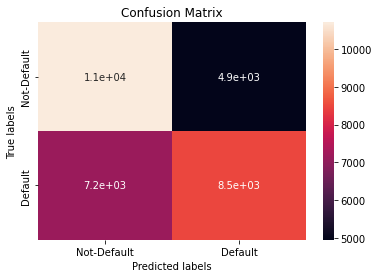

In [149]:
# Get the confusion matrix for both train and test
 
labels = ['Not-Default', 'Default']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)
 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
 
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

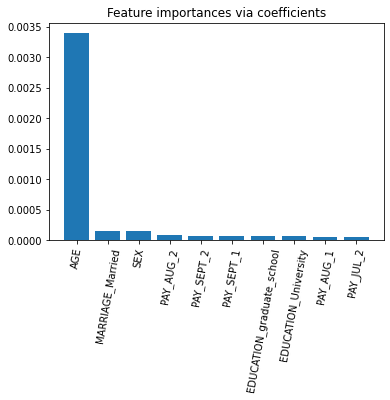

In [150]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]
 
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

# **Decision Tree**

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [105]:
X = df_new.drop(['Default','payment_status','dues'],axis=1)
y = df_new['Default']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [107]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [108]:
grid_DTC_clf.best_score_

0.7013132486670145

In [110]:
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [111]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_
optimal_DTC_clf

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [112]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [113]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)
 
print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7038681445044239
The accuracy on test data is  0.7037157123403152


In [114]:
test_precision_score_DTC = precision_score(test_class_preds,y_test)
test_recall_score_DTC = recall_score(test_class_preds,y_test)
test_f1_score_DTC = f1_score(test_class_preds,y_test)
test_roc_score_DTC = roc_auc_score(test_class_preds,y_test)
 
print("The precision on test data is ", test_precision_score_DTC)
print("The recall on test data is ", test_recall_score_DTC)
print("The f1 on test data is ", test_f1_score_DTC)
print("The roc_score on test data is ", test_roc_score_DTC)

The precision on test data is  0.669260700389105
The recall on test data is  0.7187630589218554
The f1 on test data is  0.6931291557525691
The roc_score on test data is  0.7046860671944876


In [115]:
len(optimal_DTC_clf.feature_importances_)

80

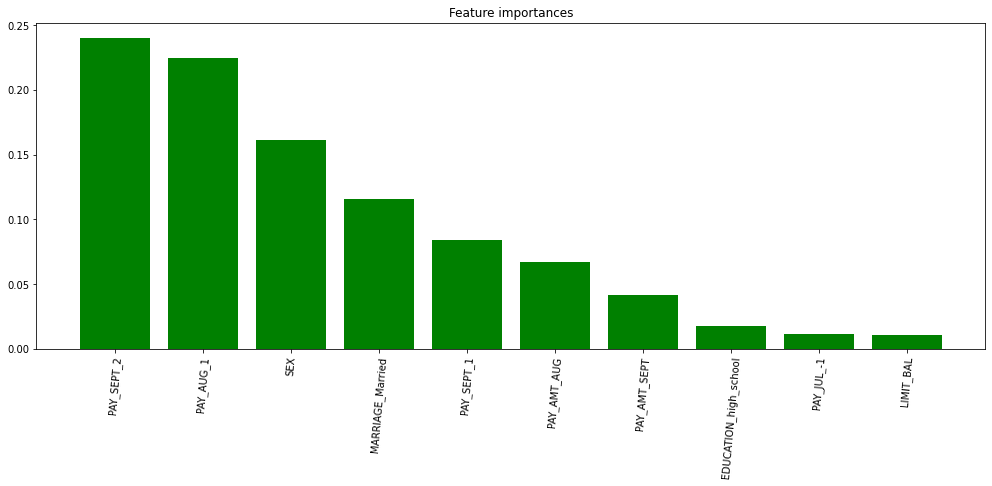

In [116]:
# Feature Importance
feature_importances_DTC = pd.DataFrame(optimal_DTC_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_DTC']).sort_values('importance_DTC',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_DTC.index, feature_importances_DTC['importance_DTC'],
        color="g",  align="center")
plt.xticks(feature_importances_DTC.index, rotation = 85)
plt.show()


# **Random Forest**

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
X = df_new.drop(['Default','payment_status','dues'],axis=1)
y = df_new['Default']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [120]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [122]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
 
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9993931069728814
The accuracy on test data is  0.835159846961935


In [123]:
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)
 
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The precision on test data is  0.8063553826199741
The recall on test data is  0.8556289567850262
The f1 on test data is  0.8302617521367522
The roc_score on test data is  0.8362755452226786


* **We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 83%, which is not bad.**




In [124]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [125]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [126]:
grid_rf_clf.best_score_

0.8200404298782935

In [127]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [128]:
optimal_rf_clf = grid_rf_clf.best_estimator_
optimal_rf_clf

RandomForestClassifier(max_depth=30, n_estimators=200)

In [129]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [130]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
 
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9985626217778771
The accuracy on test data is  0.8385967187601323


In [131]:
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)
 
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)


The precision on test data is  0.8107652399481193
The recall on test data is  0.8585359153962367
The f1 on test data is  0.8339670468948036
The roc_score on test data is  0.8396487930789538


In [132]:
len(optimal_rf_clf.feature_importances_)

80

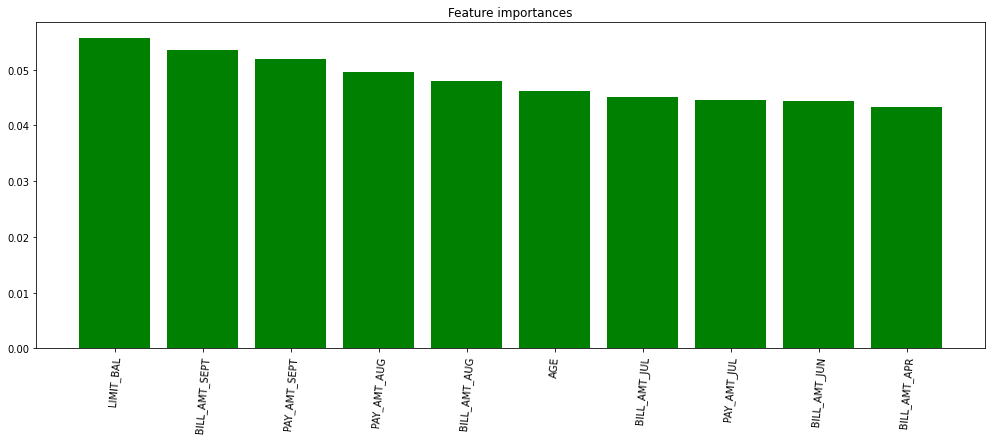

In [133]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
plt.show()


# **7. Selecting the best model**


* **Using a Logistic Regression classifier, we can predict with ~57% accuracy, whether a customer is likely to default next month.**

* **Using a Decision Tree classifier, we can predict with ~69% accuracy, whether a customer is likely to default next month.**

* **Using a Random Forest classifier, we can predict with ~83% accuracy, whether a customer is likely to default next month.**

* **Random Forest outperforms Logistic Regression and Decision Tree if measured on their F1 scores**

# **8. Conclusion**


* **The strongest predictors of default are the PAY_AMTX, the LIMIT_BAL & the PAY_AMTX.**

* **Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.**